In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [ ]:
data=pd.read_csv('adult.csv')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
selectedColumns = data [['age', 'educational-num','hours-per-week','capital-gain','capital-loss','fnlwgt','occupation','income']]
X = pd.get_dummies (selectedColumns, columns=['occupation'])
del X ['income']
X.head()

,age,educational-num,hours-per-week,capital-gain,capital-loss,fnlwgt,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,7,40,0,0,226802,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,9,50,0,0,89814,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,12,40,0,0,336951,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,10,40,7688,0,160323,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,10,30,0,0,103497,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit( data['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
le.transform( ['<=50K', '>50K', '<=50K'])

array([0, 1, 0])

In [ ]:
le.inverse_transform([1, 0, 1])

array(['>50K', '<=50K', '>50K'], dtype=object)

In [ ]:
y=pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.8189542650935429

In [ ]:
model.score(X_test, y_test)

0.8265943289998976

In [ ]:
y_pred=model.predict_proba(X_test)


In [ ]:
y_pred[0]

array([0.93605722, 0.06394278])

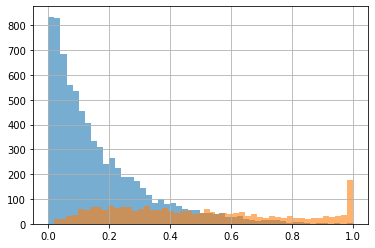

In [ ]:
import matplotlib.pyplot as plt
_=plt.hist(y_pred[y_test==0][:,1],bins=50,alpha=0.6)
_=plt.hist((y_pred[y_test==1][:,1]),bins=50,alpha=0.6)

plt.grid()

In [ ]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC( ))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
clf.score(X_train, y_train)

0.8285004990658511

In [ ]:
clf.score(X_test, y_test)

0.8319172893847886

При помощи метода опорных векторов метрика качества на ошибках обощения получилась хуже,чем при использовании метода логарифмической регрессии.